## Overview

#### This project analyzes the Titanic dataset to understand factors influencing passenger survival.
#### The objective is to explore how age, gender, passenger class, fare, and family size impacted survival outcomes.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Load Dataset


In [2]:
t2 = pd.read_csv(r"task4\data\Titanic-Dataset.csv")
t2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### Cleaning

#### Missing values were handled to ensure accurate analysis.
#### The Age column was filled using the median value, Embarked was filled using the mode, and the Cabin column was removed due to excessive missing data.

In [3]:
t2.rename(columns={"Sex": "Gender"}, inplace=True)

t2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
print("Before Cleaning:\n")
print(t2.isnull().sum())

t2["Age"] = t2["Age"].fillna(t2["Age"].median())
t2["Embarked"] = t2["Embarked"].fillna(t2["Embarked"].mode()[0])

if "Cabin" in t2.columns:
    t2 = t2.drop(columns=["Cabin"])

print("\nAfter Cleaning:\n")
print(t2.isnull().sum())
print("\nCleaning Completed Successfully ")

Before Cleaning:

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After Cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Cleaning Completed Successfully 


### Feature Engineering

#### Two new features were created:

#### FamilySize: Calculated as SibSp + Parch + 1 to represent total family members traveling together.

#### AgeGroup: Created using age binning to categorize passengers into meaningful age ranges.

#### These features help improve interpretability of survival patterns.

In [5]:
t2["FamilySize"] = t2["SibSp"] + t2["Parch"] + 1

t2["AgeGroup"] = pd.cut(
    t2["Age"],
    bins=[0, 12, 19, 35, 60, 100],
    labels=["Child", "Teen", "Young Adult", "Adult", "Senior"]
)

t2[["Age", "AgeGroup", "SibSp", "Parch", "FamilySize"]].head()

,Age,AgeGroup,SibSp,Parch,FamilySize
0,22.0,Young Adult,1,0,2
1,38.0,Adult,1,0,2
2,26.0,Young Adult,0,0,1
3,35.0,Young Adult,1,0,2
4,35.0,Young Adult,0,0,1


### Visualizations

#### Multiple charts were created to analyze survival trends and distributions:

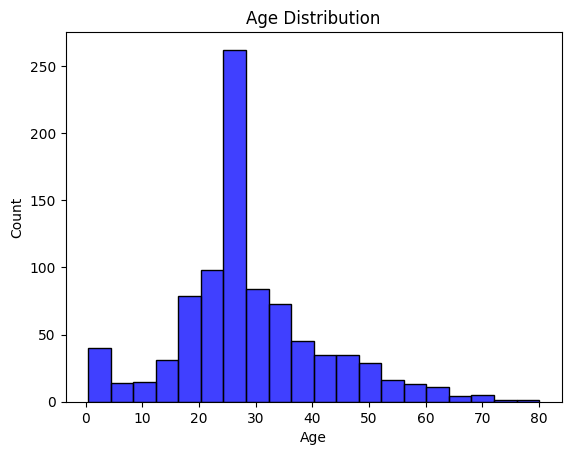

In [6]:
plt.figure()
sns.histplot(t2["Age"], bins=20,color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Age Distribution
#### The majority of passengers were young adults between 20–40 years.
#### The distribution is right-skewed, with fewer elderly passengers onboard.

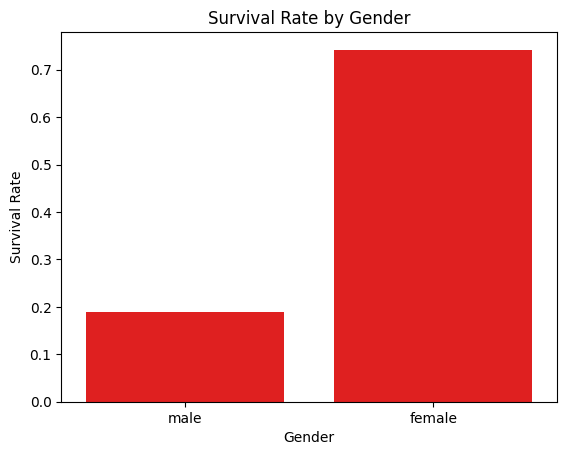

In [7]:
plt.figure()
sns.barplot(x="Gender", y="Survived", data=t2,color="red",errorbar=None)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

### Survival Rate by Gender

#### Female passengers had a significantly higher survival rate compared to males.
#### This suggests that gender played a major role in survival decisions.

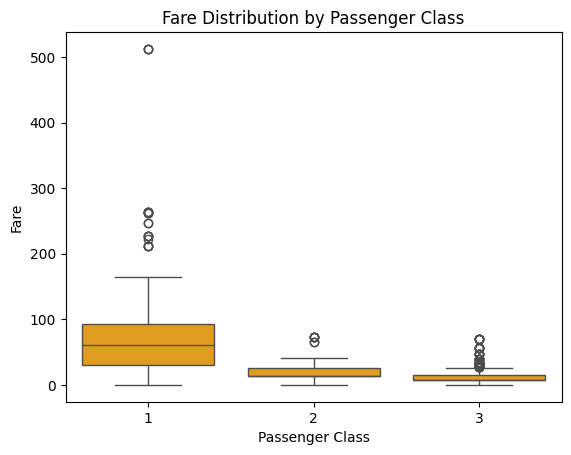

In [8]:
plt.figure()
sns.boxplot(x="Pclass", y="Fare", data=t2,color="orange")
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

### Fare Distribution by Passenger Class (Boxplot)

#### First-class passengers paid substantially higher fares than lower classes.
#### The presence of extreme outliers indicates a large variation in ticket prices.

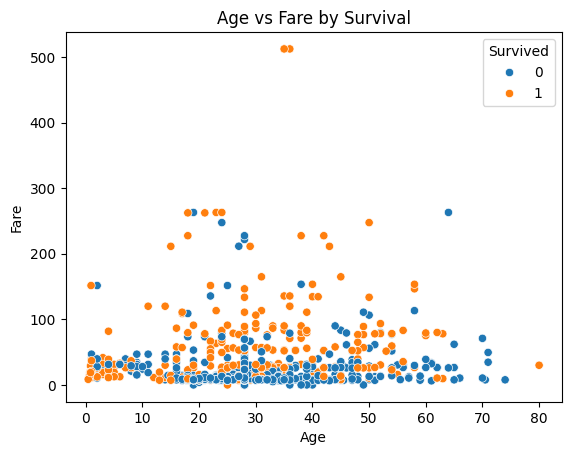

In [9]:
plt.figure()
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=t2)
plt.title("Age vs Fare by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### Age vs Fare by Survival (Scatterplot)

#### Passengers who paid higher fares appear to have slightly better survival outcomes.
#### There is no strong linear relationship between age and fare.

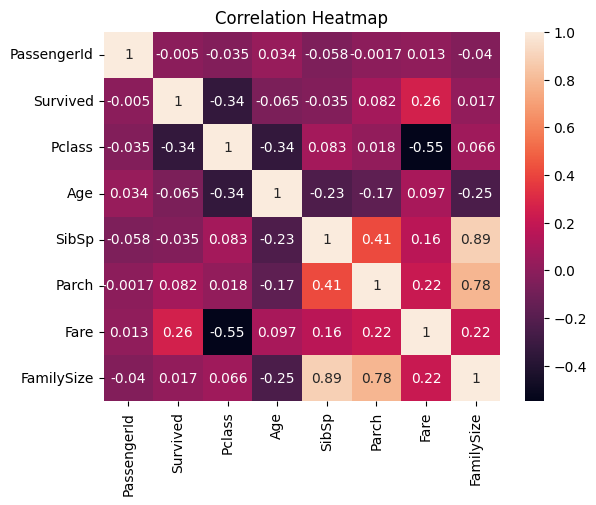

In [10]:
plt.figure()
corr = t2.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Heatmap

#### Passenger class shows a negative correlation with survival, while fare shows a positive correlation.
#### Socio-economic status appears to have influenced survival chances.

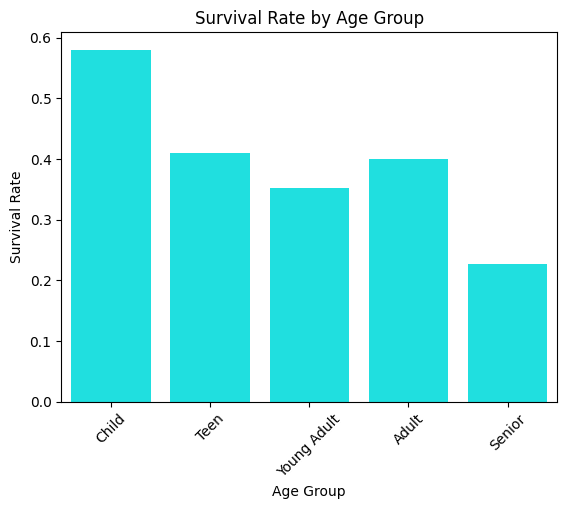

In [11]:
plt.figure()
sns.barplot(x="AgeGroup", y="Survived", data=t2, color="cyan",errorbar=None)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.show()

### Survival Rate by AgeGroup

#### Younger passengers generally show higher survival rates than older groups.
#### Age category influenced survival probability.

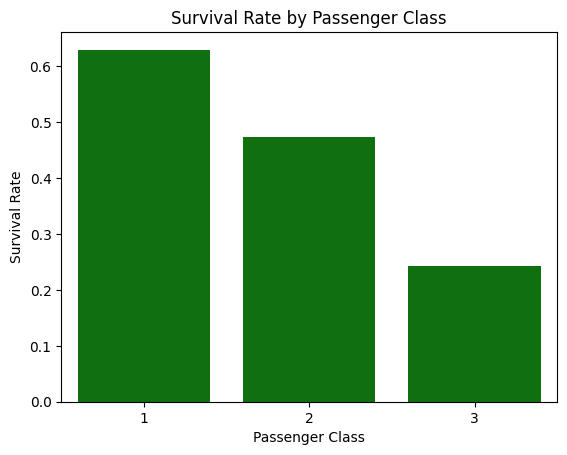

In [12]:
plt.figure()
sns.barplot(x="Pclass", y="Survived", data=t2, color="green",errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

### Survival Rate by Passenger Class

#### First-class passengers had the highest survival rate.
#### Lower-class passengers experienced lower survival chances.


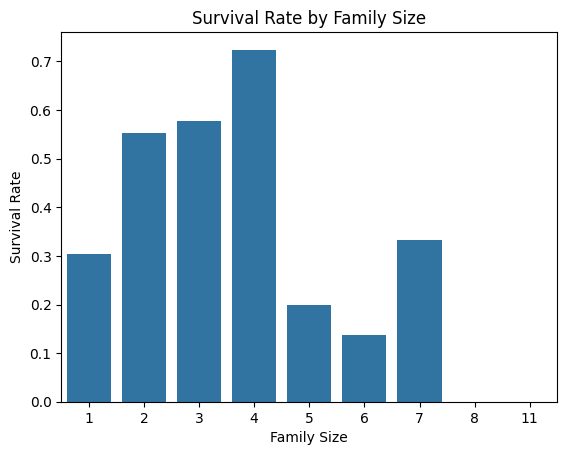

In [13]:
plt.figure()
sns.barplot(x="FamilySize", y="Survived", data=t2,errorbar=None)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

### Survival Rate by FamilySize

#### Passengers traveling in small families had better survival rates than those alone or in very large groups.
#### Extremely large family sizes show reduced survival probability.

### Insights

#### Key observations from the analysis:

#### 1.Female passengers had a significantly higher survival rate than males.

#### 2.First-class passengers had better survival chances compared to lower classes.

#### 3.Younger passengers showed relatively higher survival probability.

#### 4.Passengers traveling with small families had better survival rates than those alone or in very large groups.

#### 5.Fare positively correlated with survival, suggesting socio-economic influence.

### Conclusion


#### The analysis shows that survival on the Titanic was strongly influenced by gender, passenger class, and socio-economic status.
#### Feature engineering and visualization techniques helped uncover meaningful patterns in the dataset.
#### This project demonstrates practical data cleaning, feature creation, and exploratory data analysis using pandas, matplotlib, and seaborn.
